<a href="https://colab.research.google.com/github/shyamjith94/OpencvImagemanipulation/blob/main/2_5_2_Spatial_FilteringCV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
%%capture
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png   

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2

In [25]:
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
    plt.title(title_2)
    plt.show()

In [26]:
image_cameraman = "cameraman.jpeg"
image_lenna = "lenna.png"
image_barbara = "barbara.png"   

## Linear Filtering

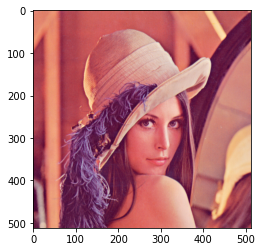

In [27]:
image = cv2.imread(image_lenna)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

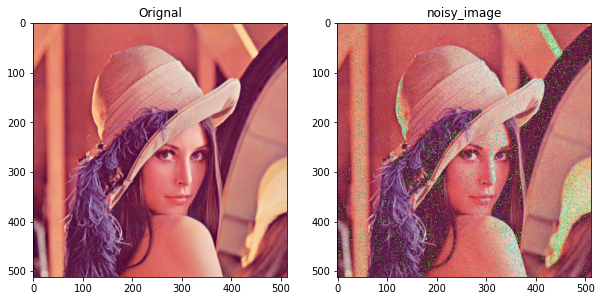

In [28]:
rows, cols, _ = image.shape
noise = np.random.normal(0, 15, (cols, rows, 3)).astype(np.uint8)
noisy_image = image + noise
plot_image(image, noisy_image, title_2="noisy_image")

## Filtering Noise

In [29]:
kernel = np.ones((6,6))/36 # Create a kernel which is a 6 by 6 array where each value is 1/36
image_filtered = cv2.filter2D(src=noisy_image, ddepth=-1, kernel=kernel)

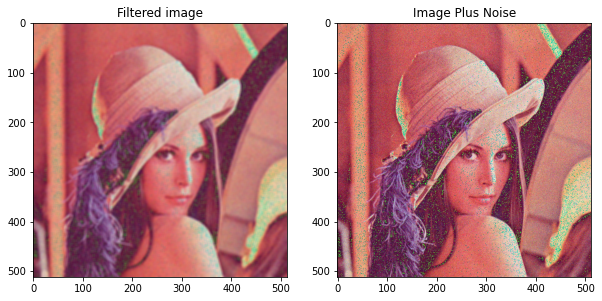

In [30]:
plot_image(image_filtered, noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

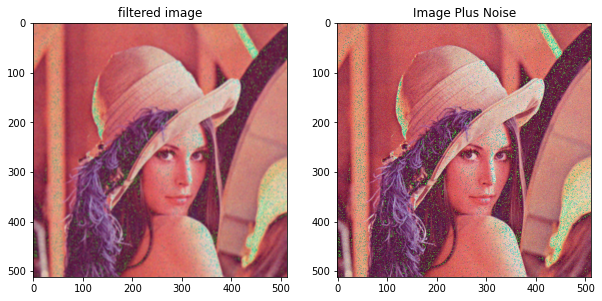

In [31]:
# Creates a kernel which is a 4 by 4 array where each value is 1/16
kernel = np.ones((4,4))/16
# Filters the images using the kernel
image_filtered=cv2.filter2D(src=noisy_image,ddepth=-1,kernel=kernel)
# Plots the Filtered and Image with Noise using the function defined at the top
plot_image(image_filtered , noisy_image,title_1="filtered image",title_2="Image Plus Noise")

##Gaussian Blur

<p><code>sigmaX</code> Gaussian kernel standard deviation in the X direction</p>
<p><code>sigmaY</code> Gaussian kernel standard deviation in the Y direction; if sigmaY is zero, it is set to be equal to sigmaX </p>

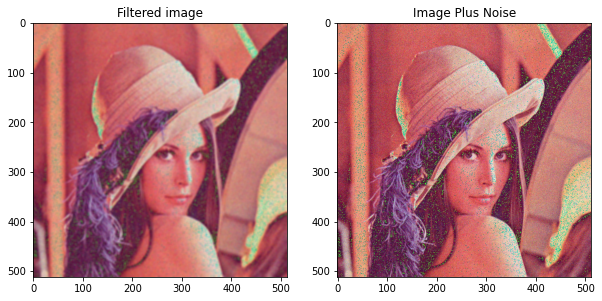

In [32]:
image_filtered = cv2.GaussianBlur(noisy_image,(5,5),sigmaX=4,sigmaY=4)
plot_image(image_filtered , noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

##Image Sharpening

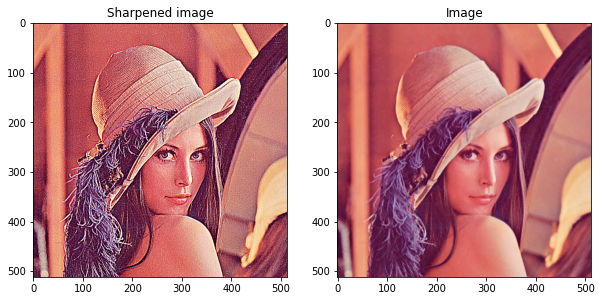

In [33]:
# Common Kernel for image sharpening
kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])
# Applys the sharpening filter using kernel on the original image without noise
sharpened = cv2.filter2D(image, -1, kernel)
# Plots the sharpened image and the original image without noise
plot_image(sharpened , image, title_1="Sharpened image",title_2="Image")

##Edges

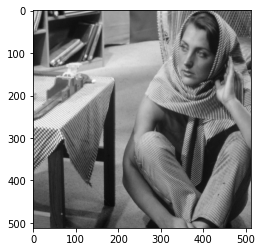

In [34]:
# sobel edge detection
img_gray = cv2.imread(image_barbara, cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray ,cmap='gray')
plt.show()

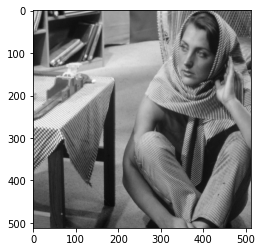

In [35]:
# We smooth the image, this decreases changes that may be caused by noise that would affect the gradient.
img_gray = cv2.GaussianBlur(img_gray,(3,3),sigmaX=0.1,sigmaY=0.1)
plt.imshow(img_gray ,cmap='gray')
plt.show()

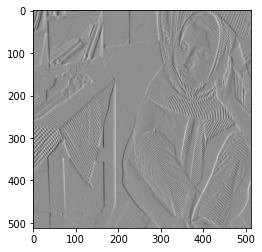

In [36]:
ddepth = cv2.CV_16S
# Applys the filter on the image in the X direction
grad_x = cv2.Sobel(src=img_gray, ddepth=ddepth, dx=1, dy=0, ksize=3)
plt.imshow(grad_x,cmap='gray')
plt.show()

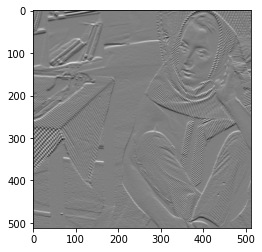

In [38]:
# Applys the filter on the image in the X direction
grad_y = cv2.Sobel(src=img_gray, ddepth=ddepth, dx=0, dy=1, ksize=3)
plt.imshow(grad_y,cmap='gray')
plt.show()

In [39]:
# We can approximate the gradient by calculating absolute values, and converts the result to 8-bit:
# Converts the values back to a number between 0 and 255
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

In [40]:
abs_grad_x

array([[  0, 102,  24, ...,  24,  18,   0],
       [  0,  99,  30, ...,   3,   4,   0],
       [  0,  74,  51, ...,  53,  35,   0],
       ...,
       [  0,   2,  18, ...,   1,   6,   0],
       [  0,   9,   9, ...,   7,   5,   0],
       [  0,  14,  10, ...,  12,   2,   0]], dtype=uint8)

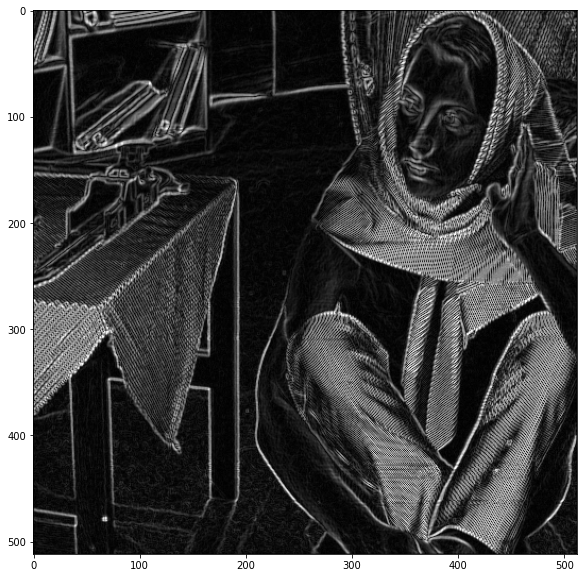

In [41]:
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
plt.figure(figsize=(10,10))
plt.imshow(grad,cmap='gray')
plt.show()

## Median

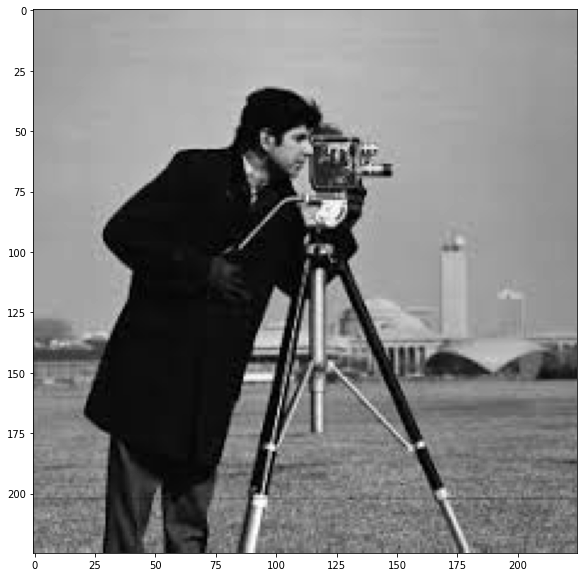

In [42]:
# Load the camera man image
image = cv2.imread(image_cameraman,cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(image,cmap="gray")
plt.show()

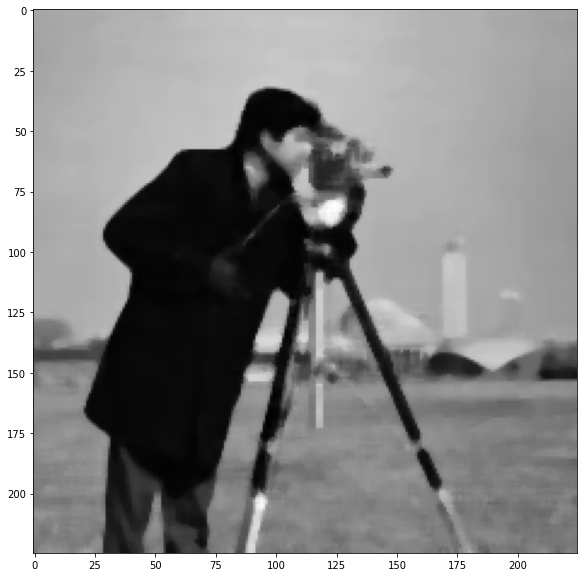

In [43]:
# Filter the image using Median Blur with a kernel of size 5
filtered_image = cv2.medianBlur(image, 5)
plt.figure(figsize=(10,10))
plt.imshow(filtered_image,cmap="gray")
plt.show()

Threshold Pram

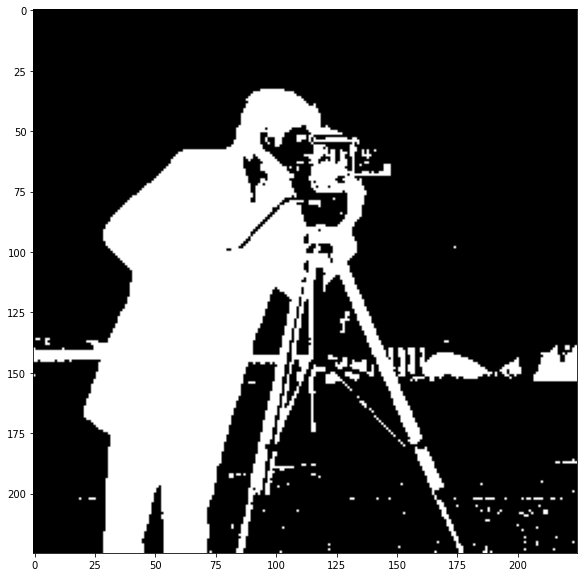

In [47]:
# Returns ret which is the threshold used and outs which is the image
ret, outs = cv2.threshold(image, thresh=0, maxval=255, type=cv2.THRESH_OTSU+cv2.THRESH_BINARY_INV)
plt.figure(figsize=(10,10))
plt.imshow(outs, cmap='gray')
plt.show()